# Building data on Munich

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import contextily as ctx
from random import randint
import random
import mplleaflet


## Data Pre-Processing

In [2]:
#Read Excel-Sheet
data = pd.read_excel('EnergyPerBuilding_Munich-2015-0_0.xlsx')
data.head(10)

,Munich,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,bid,footprint_area,use,free_walls,lon,lat,dist_to_heat_source,year_class,size_class,floors,...,sh_demand,solar_gains,int_gains,sh_demand_per_h_area,solar_gains_per_h_area,int_gains_per_h_area,hw_demand,hw_demand_m3,total_demand,total_demand_per_h_area
1,7,71.52,3,4,48.1757,11.3836,0,10,0,2,...,1.06766e+07,2.34068e+06,2305086,93300.9,20454.8,20143.7,1.02051e+06,16.23,1.16971e+07,102219
2,46,54.03,3,2,48.1749,11.3876,0,8,1,2,...,8.22951e+06,1.79002e+06,800274,95196,20706.3,9257.29,1.01971e+06,16.24,9.24922e+06,106992
3,14,77.41,3,4,48.1746,11.3852,0,8,0,2,...,1.45455e+07,2.93739e+06,1671120,117439,23716.2,13492.4,1.13483e+06,18.03,1.56803e+07,126601
4,16,181.46,3,4,48.1752,11.3862,0,9,0,2,...,2.78205e+07,5.18657e+06,3535632,95821.8,17864,12177.7,1.68073e+06,26.74,2.95012e+07,101611
5,0,61.42,3,4,48.176,11.3826,0,10,0,2,...,8.55143e+06,1.64538e+06,710146,87018,16743.1,7226.33,1.6766e+06,26.74,1.0228e+07,104079
6,13,226.78,3,4,48.1739,11.3851,0,5,0,1,...,2.9671e+07,4.0677e+06,1461376,163545,22421,8055.03,2.03897e+06,32.36,3.17099e+07,174784
7,19,154.17,3,4,48.1754,11.3856,0,9,0,2,...,2.63965e+07,4.7159e+06,2375634,107010,19118.1,9630.74,1.7169e+06,27.33,2.81134e+07,113971
8,33,113.91,3,4,48.1739,11.3862,0,9,0,2,...,1.92795e+07,3.28788e+06,770970,105782,18039.9,4230.15,1.67649e+06,26.74,2.0956e+07,114981
9,2,154.24,3,4,48.1758,11.3828,0,10,0,2,...,2.76797e+07,5.45865e+06,812658,112162,22119.2,3292.99,2.69473e+06,42.99,3.03744e+07,123081


In [3]:
#Formatting
data.columns = data.iloc[0]
data = data.iloc[1:]
data.head(10)

,bid,footprint_area,use,free_walls,lon,lat,dist_to_heat_source,year_class,size_class,floors,...,sh_demand,solar_gains,int_gains,sh_demand_per_h_area,solar_gains_per_h_area,int_gains_per_h_area,hw_demand,hw_demand_m3,total_demand,total_demand_per_h_area
1,7,71.52,3,4,48.1757,11.3836,0,10,0,2,...,1.06766e+07,2.34068e+06,2305086,93300.9,20454.8,20143.7,1.02051e+06,16.23,1.16971e+07,102219
2,46,54.03,3,2,48.1749,11.3876,0,8,1,2,...,8.22951e+06,1.79002e+06,800274,95196,20706.3,9257.29,1.01971e+06,16.24,9.24922e+06,106992
3,14,77.41,3,4,48.1746,11.3852,0,8,0,2,...,1.45455e+07,2.93739e+06,1671120,117439,23716.2,13492.4,1.13483e+06,18.03,1.56803e+07,126601
4,16,181.46,3,4,48.1752,11.3862,0,9,0,2,...,2.78205e+07,5.18657e+06,3535632,95821.8,17864,12177.7,1.68073e+06,26.74,2.95012e+07,101611
5,0,61.42,3,4,48.176,11.3826,0,10,0,2,...,8.55143e+06,1.64538e+06,710146,87018,16743.1,7226.33,1.6766e+06,26.74,1.0228e+07,104079
6,13,226.78,3,4,48.1739,11.3851,0,5,0,1,...,2.9671e+07,4.0677e+06,1461376,163545,22421,8055.03,2.03897e+06,32.36,3.17099e+07,174784
7,19,154.17,3,4,48.1754,11.3856,0,9,0,2,...,2.63965e+07,4.7159e+06,2375634,107010,19118.1,9630.74,1.7169e+06,27.33,2.81134e+07,113971
8,33,113.91,3,4,48.1739,11.3862,0,9,0,2,...,1.92795e+07,3.28788e+06,770970,105782,18039.9,4230.15,1.67649e+06,26.74,2.0956e+07,114981
9,2,154.24,3,4,48.1758,11.3828,0,10,0,2,...,2.76797e+07,5.45865e+06,812658,112162,22119.2,3292.99,2.69473e+06,42.99,3.03744e+07,123081
10,23,57.96,3,4,48.1748,11.3862,0,7,0,2,...,1.84841e+07,2.64308e+06,1805924,199320,28501.1,19473.8,2.03897e+06,32.36,2.05231e+07,221307


In [5]:
#Slice for relevant attributes (here coordinates)
geo_coordinates = data.loc[:, ['lon','lat','total_demand']]
geo_coordinates.head(10)

,lon,lat,total_demand
1,48.1757,11.3836,1.16971e+07
2,48.1749,11.3876,9.24922e+06
3,48.1746,11.3852,1.56803e+07
4,48.1752,11.3862,2.95012e+07
5,48.176,11.3826,1.0228e+07
6,48.1739,11.3851,3.17099e+07
7,48.1754,11.3856,2.81134e+07
8,48.1739,11.3862,2.0956e+07
9,48.1758,11.3828,3.03744e+07
10,48.1748,11.3862,2.05231e+07


In [6]:
#Format to correct data type
cols = geo_coordinates.select_dtypes(exclude=['float']).columns
geo_coordinates[cols] = geo_coordinates[cols].apply(pd.to_numeric, downcast='float', errors='coerce')


## K-Means Clustering

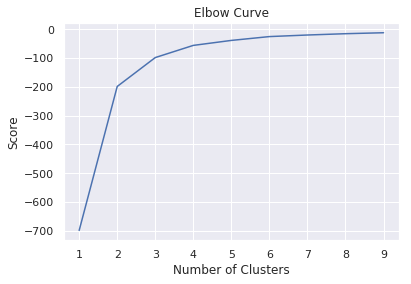

In [7]:
# Calculate the optimal amount of clusters with Elbow method
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = geo_coordinates[['lat']]
X_axis = geo_coordinates[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
geo_coordinates[geo_coordinates.columns[0:2]].head(10)

,lon,lat
1,48.175716,11.383578
2,48.174908,11.387557
3,48.174618,11.385216
4,48.175198,11.386161
5,48.175972,11.382558
6,48.173901,11.385131
7,48.175365,11.385581
8,48.173935,11.386213
9,48.175808,11.382796
10,48.174820,11.386216


In [10]:
#K-Means algorithm implementation
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(geo_coordinates[geo_coordinates.columns[0:2]]) # Compute k-means clustering.
geo_coordinates['cluster_label'] = kmeans.fit_predict(geo_coordinates[geo_coordinates.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(geo_coordinates[geo_coordinates.columns[0:2]]) # Labels of each point
geo_coordinates.head(10)

,lon,lat,total_demand,cluster_label
1,48.175716,11.383578,11697117.0,0
2,48.174908,11.387557,9249217.0,0
3,48.174618,11.385216,15680342.0,0
4,48.175198,11.386161,29501244.0,0
5,48.175972,11.382558,10228030.0,0
6,48.173901,11.385131,31709922.0,0
7,48.175365,11.385581,28113364.0,0
8,48.173935,11.386213,20955972.0,0
9,48.175808,11.382796,30374410.0,0
10,48.174820,11.386216,20523086.0,0


In [13]:
n_clusters = 5
x = 0.01 # percentage
indices = list()

for i in range(n_clusters):

    # (1) indices of all the points from X that belong to cluster i
    C_i = np.where(geo_coordinates['cluster_label'] == i)[0].tolist() 
    n_i = len(C_i) # number of points in cluster i

    # (2) indices of the points from X to be sampled from cluster i
    sample_i = np.random.choice(C_i, int(x * n_i)) 
    indices.extend(sample_i)
    print(i, sample_i)
geo_coordinates_red = geo_coordinates.ix[indices] 
labels_red = labels[indices]

0 [10215  8613  1475 12900  5728 29880 14222 26111 37220 15518  6149  7652
 24068  4524 16506 16006 21225 13883 11435 13295  1957 37555 17619 16787
  7964 15383 12280  4245 15460 20046 29953 17717 21240 21153 11795 21563
 27908 21973   584 13268 27552 21237 11940  2562   815  5216 18851  1285
 17716 18274  1096 14563 20106 10293 19797 21634  7920 14531 18990 15902
  4589 15067 16388 22085 15292  6165 16155 12868  7624  9608  3020  1362
  6175 12268 10345  8171  6947  7113 10357  3046 28257 37377 23357 35297
 16146 10723  5754 19966  9837  5638 17777 14285  3764 14303 19270  1252
 23766 37278 17702 23726 14074  6127 14484  2421 14894 18027 15410  8860
 16014 11446 15996  1119  8692 23556  3237 14000 32092  5713  1063 18246
 15054 15760 24180 14258 12854  1359  4305  3922 11632  3375  6851   625
 23339 37511  7067 11720 23816  9346 26130  7262 16471 10880 19253 14354
 11278 13456 14609  2653  7893 13769 18453  8148 17072 37297 17297 30246
 28234 20967 13107  7174   656 13096  2728 14706 

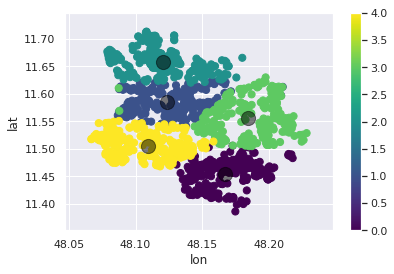

In [14]:
# Visualize the clustering results (as the data is too big for a viz, slice it randomly with an index range)
#fig, ax = plt.subplots()

geo_coordinates_red.plot.scatter(x = 'lon', y = 'lat', c=labels_red, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)



In [16]:
fig, ax = plt.subplots()

x = geo_coordinates_red['lat'].tolist()
y = geo_coordinates_red['lon'].tolist()
labels_heat = geo_coordinates_red['total_demand'].tolist()

ax.plot(x, y, 'ro')
mplleaflet.display(fig=fig)